In [1]:
exec(open("init_notebook.py", "r").read())
%load_ext autoreload
%autoreload 2

current working dirC:\AV\Carla\CARLA_0.9.13\WindowsNoEditor\PythonAPI\experiments


In [2]:
import logging
from tqdm import tqdm

In [22]:
from research.adversaries.EnvironmentFactory import EnvironmentFactory, AvailableEnvironments
dataDir = "D:/AV/DataSetExploration/jaywalker"
env = EnvironmentFactory.create(
    AvailableEnvironments.R1V1Env1, 
    defaultLogLevel=logging.ERROR,
    output_dir=dataDir
)

research chosen : R1v1 with host: 127.0.0.1, port: 2000, log level: 40, output directory: D:/AV/DataSetExploration/jaywalker


C:\Users\adhocmaster\anaconda3\envs\carla37\lib\site-packages\gym\spaces\box.py:74: UserWarning: WARN: Box bound precision lowered by casting to float32
  "Box bound precision lowered by casting to {}".format(self.dtype)


In [23]:
env.getActionTicks('a')

25

In [24]:
# env.research.getWalkerAgent().updateLogLevel(logging.INFO)

In [25]:
# env.reset()

In [33]:
# take 5 actions which should run 5 seconds of simulation
for _ in tqdm(range(1500), desc="Steps"):
    state, reward, done, _ = env.step('sa')
    if done:
        env.reset()

Steps: 100%|███████████████████████████████████████████████████████████████████████████| 20/20 [00:28<00:00,  1.44s/it]


In [8]:
env.close()

In [9]:
# env.research.episodeTrajectoryRecorders

In [10]:
recorder = env.research.episodeTrajectoryRecorders[1]

In [11]:
recorder.trajectories

{3091: <lib.Trajectory.Trajectory at 0x21c684a5408>,
 3090: <lib.Trajectory.Trajectory at 0x21c684a5708>}

In [12]:
recorder.getAsDataFrame()

,frame,mapX,mapY,recordingId,trackId,class
0,1,-113.000000,-3.000000,1,3091,pedestrian
1,2,-113.000000,-3.000000,1,3091,pedestrian
2,3,-113.000000,-3.000000,1,3091,pedestrian
3,4,-113.000000,-3.000000,1,3091,pedestrian
4,5,-113.000000,-3.000000,1,3091,pedestrian
...,...,...,...,...,...,...
245,121,-122.844147,-6.841335,1,3090,vehicle
246,122,-122.554253,-6.843338,1,3090,vehicle
247,123,-122.267410,-6.845317,1,3090,vehicle
248,124,-121.984245,-6.847271,1,3090,vehicle


In [13]:
recorder.fps

25.0

In [14]:
1 / env.research.time_delta

25.0

In [15]:
vehicle = env.research.vehicle
walker = env.research.walker

In [16]:
from lib.VehicleUtils import VehicleUtils

In [17]:
contour = VehicleUtils.getYANGContour(vehicle)

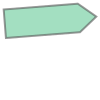

In [18]:
contour

In [19]:
from shapely.ops import nearest_points
from shapely.geometry import Point
points = nearest_points(contour, Point(walker.get_location().x, walker.get_location().y))
for point in points:
    print(point)

print(walker.get_location())

POINT (-143.5513181327094 -6.452559543553679)
POINT (-113 -3)
Location(x=-113.000000, y=-3.000000, z=1.103900)


In [20]:
X = contour.exterior.xy[0]
Y = contour.exterior.xy[1]
print(X, Y)
for point in zip(X, Y):
    print(point)

array('d', [-149.34326007649298, -144.7108085110746, -143.5513181327094, -144.5715441378809, -149.20399570329928, -149.34326007649298]) array('d', [-6.007823918963144, -5.646048567617896, -6.452559543553679, -7.429297374395766, -7.791072725741017, -6.007823918963144])
(-149.34326007649298, -6.007823918963144)
(-144.7108085110746, -5.646048567617896)
(-143.5513181327094, -6.452559543553679)
(-144.5715441378809, -7.429297374395766)
(-149.20399570329928, -7.791072725741017)
(-149.34326007649298, -6.007823918963144)


In [21]:
visualizer = env.research.visualizer
for _ in tqdm(range(5), desc="Steps"):
    state, reward, done, _ = env.step('sa')
    if done:
        env.reset()
    else:
        vehicle = env.research.vehicle
        contour = VehicleUtils.getYANGContour(vehicle)
        visualizer.drawShaplyPolygon(contour, color=(0, 0, 255,0), life_time=1.0, z=1.5)

Steps:  40%|██████████████████████████████▊                                              | 2/5 [00:03<00:04,  1.53s/it]


KeyboardInterrupt: 